# Bar charts

In [1]:
# %%%%%%%% imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_misc.barchart as barchart
import plot_misc.example_data.examples as examples
from matplotlib.patches import Patch
from matplotlib.ticker import MaxNLocator
%matplotlib inline

In [2]:
# import example data
table = examples.load_barchart_data()
table = table.T

# constants
COLOURS = ['red', 'green', 'orange']
EDGECOLOUR = 'black'
TICKS_WD = 0.6
CMTOINCH = 1/2.54
LABELS = 'labels'

# Adding the index as a column
table['labels'] = table.index
table=table.loc[['Heart failure', 'HCM', 'DCM', 'Non-ischemic CM', 'AF']]

# show table
table.head()

cardiac_chambers  LA  LV  RV           labels
Heart failure      3   6   3    Heart failure
HCM                0   4   4              HCM
DCM                1   6   3              DCM
Non-ischemic CM    0   5   3  Non-ischemic CM
AF                 4   5   2               AF

## Stacked barchart 

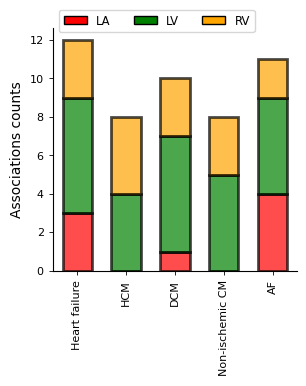

In [3]:
### figure
fig,  ax = plt.subplots(figsize=(8 * CMTOINCH, 8 *CMTOINCH),
                        nrows=1, sharex=True, sharey=False)
ax = barchart.stack_bar(table, label=LABELS, columns=table.columns[:-1].to_list(),
                        wd=0.6, edgecolor=EDGECOLOUR, colours=COLOURS, ax=ax,
                        **{'linewidth':2}
                        )
### formatting
# x-axis
ax.set_xlim(-0.5,table.shape[0]-0.5)
# labels and ticks
ax.tick_params(axis="x", labelsize=8.0, length=3, width=TICKS_WD, rotation=90)
ax.tick_params(axis="y", labelsize=8.0, length=3, width=TICKS_WD, rotation=0)
# only integer
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# remove labels
ax.set_ylabel('Associations counts')
ax.set_xlabel('')
# legend
cmap = dict(zip(list(table.columns[:-1]), COLOURS))
patches = [Patch(facecolor=v, label=k, edgecolor=EDGECOLOUR) for k, v in cmap.items()]
ax.legend(handles=patches , ncol=3, bbox_to_anchor=(0.85, 1.10),
          fancybox=True, shadow=False, fontsize='small', markerscale=0.6,
          )

In [4]:
# import example data
group_table = examples.load_groupbar_data()
data_points = examples.load_barpoints_data()

# constants
COLOURS = ['white'] + COLOURS
GENES = ['Control', 'AP4S1', 'LRRC39', 'ZFAND4']
BWID = .2
LWID = 1
col_dic = {k: v for k, v in zip(GENES, COLOURS)}

# columns to plot
cols = [x + '_mean' for x in GENES]
errs = [x + '_std' for x in GENES]

# show table that will create the bars
group_table.head()

Age  AP4S1_mean  Control_mean  LRRC39_mean  ZFAND4_mean  AP4S1_std  \
0  Day 13   29.555556     14.444444    30.333333    32.333333  11.402972   
1  Day 27   37.222222     16.444444    32.333333    37.777778  15.610716   

   Control_std  LRRC39_std  ZFAND4_std  
0     9.015419   16.568042   15.288885  
1    12.217929   12.439855   15.682616

In [5]:
# show data for individual data points
data_points.head()

Gene  Day 27  Day 13
0  Control    29.0    10.0
1  Control    43.0    30.0
2  Control    13.0     0.0
3  Control    18.0     9.0
4  Control     5.0     7.0

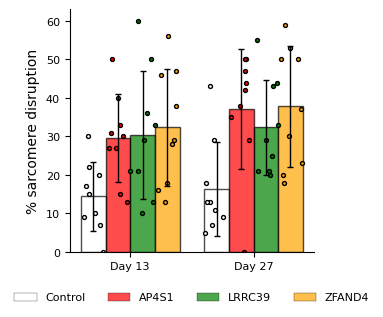

In [6]:
### figure
fig,  ax = plt.subplots(figsize=(8 * CMTOINCH, 8 *CMTOINCH),
                        nrows=1, sharex=True, sharey=False)
ax = barchart.group_bar(group_table, label = 'Age',
        columns = cols, errors = errs, colours = COLOURS, 
        transparancy = .7, csiz = 2, wd = BWID,
        linewidth = LWID, ax = ax,
        error_kw = {'elinewidth' : LWID,
                    'capthick'   : LWID,
        })

# Obtain middle of all bars
x_mid = ax.get_xticks()
bar_mid = []
for x in x_mid:
    bar_mid += [x - 2 * BWID, x - BWID, x, x + BWID]

i = 0
for col in ['Day 13', 'Day 27']:
    for gene in GENES:
        tmp = data_points.loc[data_points['Gene'] == gene, col]
        ax.scatter(bar_mid[i] + np.random.random(tmp.size) * BWID, tmp, s = 8,
                color = col_dic[gene], edgecolors = 'black', linewidths = LWID)
        i += 1

# Lay-out
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_ylabel('% sarcomere disruption')

# legend
patches = [Patch(facecolor=v, label=k, edgecolor='black', lw = .3, alpha = .7)
    for k, v in col_dic.items()]
legend = ax.legend(handles = patches, loc = 'lower center', ncol = 4,
            bbox_to_anchor = (0.5, -.25), frameon = False, shadow = False,
            fontsize = 8, markerscale = 0.6, )
legend.get_frame().set_linewidth(LWID)


In [7]:
help(barchart)

Help on module plot_misc.barchart in plot_misc:

NAME
    plot_misc.barchart - A collection of various bar chart functions, based on matplotlib.

FUNCTIONS
    bar(df: pandas.core.frame.DataFrame, label: str, column: str, ax: matplotlib.axes._axes.Axes, colours: List[str] = ['tab:blue', 'tab:pink'], transparancy: float = 0.7, wd: float = 1, edgecolor: str = 'black', **kwargs: Union[Any, NoneType]) -> matplotlib.axes._axes.Axes
        Plot a barchart with sequentially coloured bars.
        
        Arguments
        ---------
        df : pd.DF
        label : str
            The column name with the axes labels you want to use.
        column : str
            The column name with the (y-axis) values (floats/int) that need to be
            plotted.
        colours : list
            A list of colours, can be a single or multiple values (will get
            recycled).
        colours : str
            A list of colours of the bars.
        transparancy : str, default 0.7
           